In [1]:
import sklearn
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("mnt")
%cd "mnt/My Drive/Colab Notebooks/DICProject"

Drive already mounted at mnt; to attempt to forcibly remount, call drive.mount("mnt", force_remount=True).
/content/mnt/My Drive/Colab Notebooks/DICProject


In [2]:
### Datacleaning and preprcoessing from Phase 1
df=pd.read_csv('2008.csv')
deduplicate_df = df.drop_duplicates(keep='first')
deduplicate_df['WeatherDelay'] = deduplicate_df['WeatherDelay'].fillna(0)
deduplicate_df['CarrierDelay'] = deduplicate_df['CarrierDelay'].fillna(0)
deduplicate_df['NASDelay'] = deduplicate_df['NASDelay'].fillna(0)
deduplicate_df['LateAircraftDelay']=deduplicate_df['LateAircraftDelay'].fillna(0)
deduplicate_df['SecurityDelay'] = deduplicate_df['SecurityDelay'].fillna(0)
deduplicate_df['ArrDelay'] = deduplicate_df['ArrDelay'].fillna(0)
Cancelled_df = deduplicate_df.loc[deduplicate_df['Cancelled']==1]
Non_Cancelled_df = deduplicate_df.loc[deduplicate_df['Cancelled']!=1]
Non_Cancelled_df = Non_Cancelled_df.drop(columns = ['Cancelled','CancellationCode'])
Non_Diverted_df = Non_Cancelled_df.loc[Non_Cancelled_df['Diverted']!=1]
Non_Diverted_df = Non_Diverted_df.drop(columns = ['Diverted'])
Non_Diverted_df['TotalDelay'] = Non_Diverted_df['WeatherDelay']+Non_Diverted_df['CarrierDelay']+Non_Diverted_df['NASDelay']+Non_Diverted_df['LateAircraftDelay']+Non_Diverted_df['SecurityDelay']
Non_Diverted_df = Non_Diverted_df.drop(columns = ['WeatherDelay','CarrierDelay','NASDelay','LateAircraftDelay','SecurityDelay'])
Cleaned_df = Non_Diverted_df.drop(columns=['DayOfWeek'])
Cleaned_df = Cleaned_df.drop(columns = ['Year','Month','DayofMonth','UniqueCarrier','TailNum','Origin','Dest'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [3]:
### Splitting Data into Dependent and Independent variables
from numpy.core.fromnumeric import shape
from sklearn.model_selection import train_test_split
Y = Cleaned_df["TotalDelay"]
X = Cleaned_df.loc[:,Cleaned_df.columns!="TotalDelay"]
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.2)

In [4]:
### Linear Regression - Model 1
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_Train,Y_Train)
linear_reg.score(X_Train,Y_Train)
Y_pred_linear = linear_reg.predict(X_Test)
linear_reg.score (X_Test,Y_Test)
from sklearn import metrics
mae_linear = metrics.mean_absolute_error(Y_Test,Y_pred_linear)
print (mae_linear)

5.722795438180158


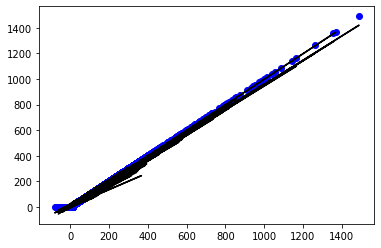

In [5]:
#import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(X_Test["ArrDelay"],Y_Test,color='b')
plt.plot(X_Test["ArrDelay"],Y_pred_linear,color='k')
plt.show()

In [6]:
### Lasso Regression - Model 2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
std_scale = StandardScaler()
X=std_scale.fit_transform(X)
X_Train,X_Test,Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2)
lasso = Lasso(alpha=0.01,normalize=False)
lasso.fit(X_Train,Y_Train)
Y_Pred_lasso = lasso.predict(X_Test)
lasso.score(X_Test,Y_Test)
from sklearn import metrics
mae_lasso = metrics.mean_absolute_error(Y_Test,Y_Pred_lasso)
print (mae_lasso)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


5.7541615670314945


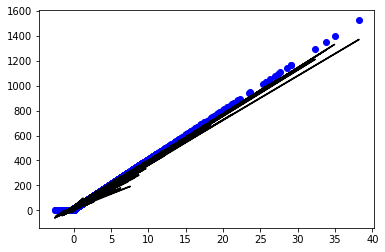

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X_Test[:,8],Y_Test,color='b')
plt.plot(X_Test[:,8],Y_Pred_lasso,color='k')
plt.show()

In [31]:
### Ridge Regression - Model 3
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
std_scale = StandardScaler()
X=std_scale.fit_transform(X)
X_Train,X_Test,Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2)
ridge=Ridge(alpha=0.01,normalize=False)
ridge.fit(X_Train, Y_Train)
Y_Pred_ridge = ridge.predict(X_Test)
ridge.score(X_Test,Y_Test)
from sklearn import metrics
mae_ridge = metrics.mean_absolute_error(Y_Test,Y_Pred_ridge)
print (mae_ridge)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


5.730084243089018


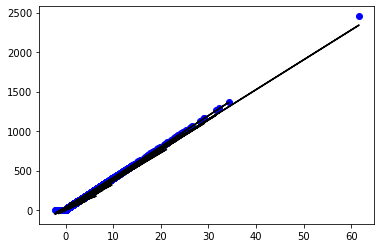

In [33]:
import matplotlib.pyplot as plt
plt.scatter(X_Test[:,8],Y_Test,color='b')
plt.plot(X_Test[:,8],Y_Pred_ridge,color='k')
plt.show()

In [34]:
### Decision Tree - Model 4
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_Train,X_Test,Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2)
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_Train,Y_Train)
Y_Pred_tree = tree_reg.predict(X_Test)
tree_reg.score(X_Test,Y_Test)
from sklearn import metrics
mae_tree = metrics.mean_absolute_error(Y_Test,Y_Pred_tree)
print (mae_tree)

0.0018002518196557314


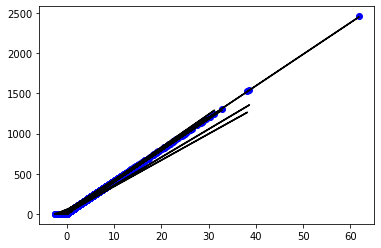

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X_Test[:,8],Y_Test,color='b')
plt.plot(X_Test[:,8],Y_Pred_tree,color='k')
plt.show()

In [40]:
### Random Forrest - Model 5
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_Train,X_Test,Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2)
forest_reg = RandomForestRegressor(n_estimators=10,random_state=0)
forest_reg.fit(X_Train,Y_Train)
Y_Pred_forest = forest_reg.predict(X_Test)
forest_reg.score(X_Test,Y_Test)
from sklearn import metrics
mae_forest = metrics.mean_absolute_error(Y_Test,Y_Pred_forest)
print (mae_forest)

0.004735848080306325


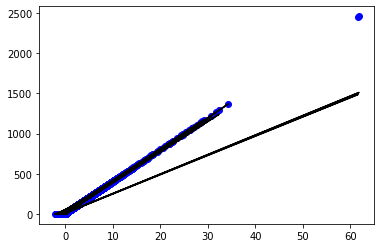

In [41]:
import matplotlib.pyplot as plt
plt.scatter(X_Test[:,8],Y_Test,color='b')
plt.plot(X_Test[:,8],Y_Pred_forest,color='k')
plt.show()